<a href="https://colab.research.google.com/github/mkbahk/QuantumComputing/blob/main/QuantumToyAlgorithm_WState_01_Felo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install qiskit[visualization]==1.2.4
%pip install qiskit-aer==0.15.1
%pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src

  Cloning https://github.com/qiskit-community/qiskit-textbook.git to /tmp/pip-req-build-x_er4ep4
  Running command git clone --filter=blob:none --quiet https://github.com/qiskit-community/qiskit-textbook.git /tmp/pip-req-build-x_er4ep4
  Resolved https://github.com/qiskit-community/qiskit-textbook.git to commit 0ae905083ec3872d7ddc6bb4001d5468f476d93f
  Preparing metadata (setup.py) ... done


In [2]:
%pip show qiskit
%pip show qiskit-aer

Name: qiskit
Version: 1.2.4
Summary: An open-source SDK for working with quantum computers at the level of extended quantum circuits, operators, and primitives.
Home-page: https://www.ibm.com/quantum/qiskit
Author: 
Author-email: Qiskit Development Team <qiskit@us.ibm.com>
License: Apache 2.0
Location: /usr/local/lib/python3.11/dist-packages
Requires: dill, numpy, python-dateutil, rustworkx, scipy, stevedore, symengine, sympy, typing-extensions
Required-by: qiskit-aer, qiskit-textbook
Name: qiskit-aer
Version: 0.15.1
Summary: Aer - High performance simulators for Qiskit
Home-page: https://github.com/Qiskit/qiskit-aer
Author: AER Development Team
Author-email: qiskit@us.ibm.com
License: Apache 2.0
Location: /usr/local/lib/python3.11/dist-packages
Requires: numpy, psutil, qiskit, scipy
Required-by: 


In [3]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram, plot_state_city, plot_bloch_multivector
from qiskit_textbook.tools import array_to_latex
from IPython.display import display, Math
import numpy as np
from math import sqrt

In [4]:
def create_w_state(n):
    circuit = QuantumCircuit(n)

    # 첫 번째 큐비트를 |1> 상태로 설정
    circuit.x(0)

    # 두 번째 큐비트와 세 번째 큐비트에 CNOT 게이트 적용
    for i in range(1, n):
        circuit.cx(0, i)
    ###for

    # Hadamard 게이트를 첫 번째 큐비트에 적용
    circuit.h(0)

    # 마지막 큐비트에 CNOT 게이트 적용
    for i in range(1, n):
        circuit.cx(i, 0)
    ###for

    return circuit
###def


In [5]:
# 3-큐빗 W-State 생성
qc = create_w_state(3)

In [6]:
print("3-큐빗 W-State 회로:")
print(qc.draw())

3-큐빗 W-State 회로:
     ┌───┐          ┌───┐┌───┐┌───┐
q_0: ┤ X ├──■────■──┤ H ├┤ X ├┤ X ├
     └───┘┌─┴─┐  │  └───┘└─┬─┘└─┬─┘
q_1: ─────┤ X ├──┼─────────■────┼──
          └───┘┌─┴─┐            │  
q_2: ──────────┤ X ├────────────■──
               └───┘               


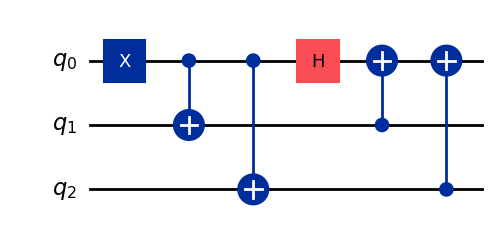

In [7]:
# 회로 시각화
qc.draw('mpl')

In [8]:
backends = Aer.backends()
backends

[AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator_statevector'),
 AerSimulator('aer_simulator_density_matrix'),
 AerSimulator('aer_simulator_stabilizer'),
 AerSimulator('aer_simulator_matrix_product_state'),
 AerSimulator('aer_simulator_extended_stabilizer'),
 AerSimulator('aer_simulator_unitary'),
 AerSimulator('aer_simulator_superop'),
 QasmSimulator('qasm_simulator'),
 StatevectorSimulator('statevector_simulator'),
 UnitarySimulator('unitary_simulator')]

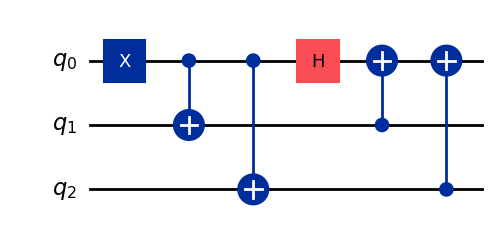

In [9]:
# 시뮬레이션 실행
backend = Aer.get_backend('statevector_simulator')

qc_transpiled = transpile(qc, backend)

qc_transpiled.draw('mpl')


In [10]:
result = backend.run(qc_transpiled, shots=1024).result()
statevector = result.get_statevector()

In [11]:
# 상태벡터 출력
print("\n상태벡터:")
print(statevector)


상태벡터:
Statevector([ 0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
              0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
              0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
              0.70710678-8.65956056e-17j, -0.70710678+8.65956056e-17j],
            dims=(2, 2, 2))


In [12]:
print(statevector.probabilities_dict())

{'110': 0.4999999999999999, '111': 0.5000000000000001}


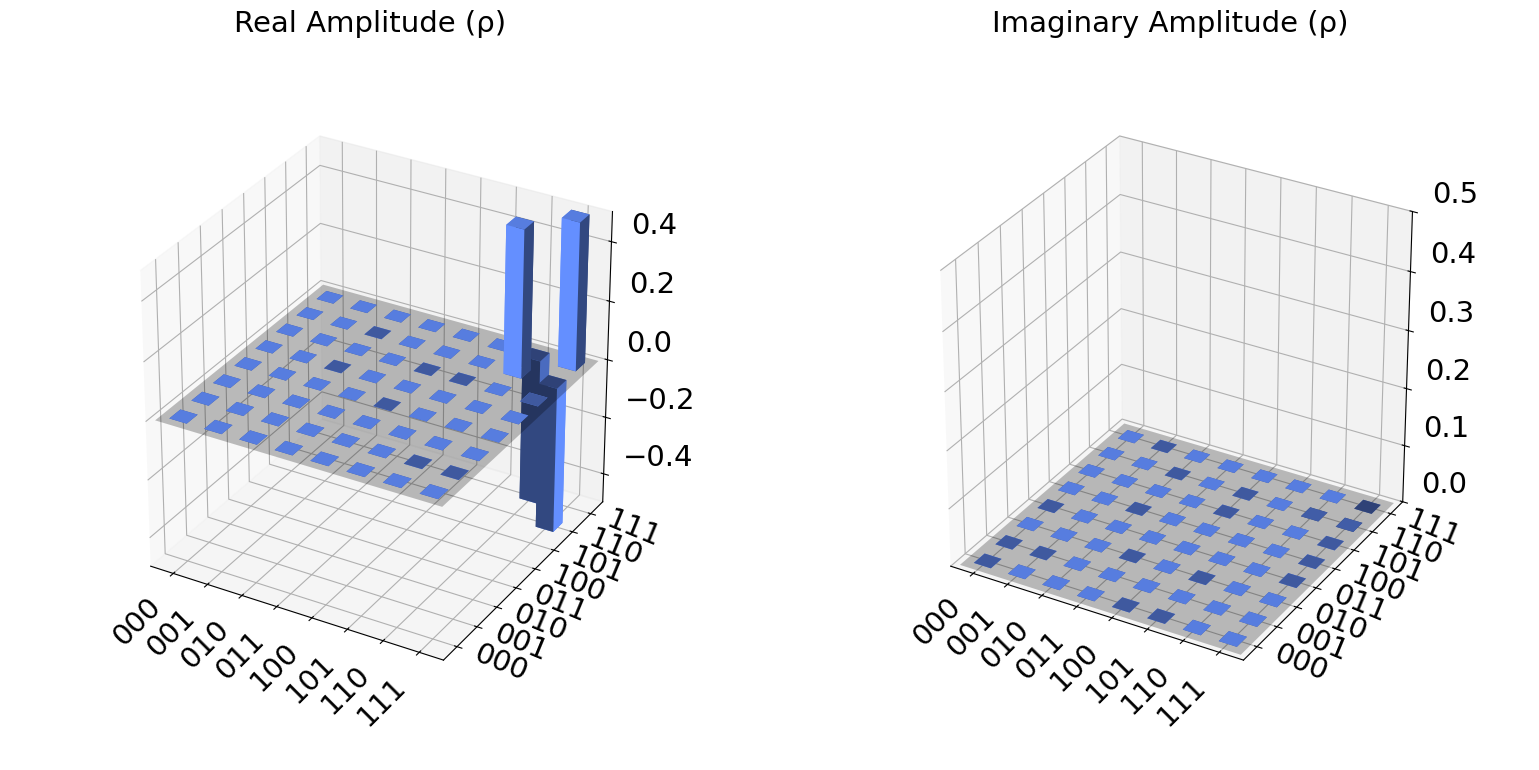

In [13]:
plot_state_city(statevector)

In [14]:
# W-State 검증
def verify_w_state(statevector, n_qubits):
    """
    생성된 상태가 W-State인지 검증
    """
    # 이론적 W-State 확률 계산
    theoretical_prob = 1 / n_qubits

    # 각 기저 상태의 확률 계산
    probabilities = {}
    for i in range(2**n_qubits):
        bitstring = format(i, f'0{n_qubits}b')
        prob = abs(statevector[i])**2
        if prob > 1e-10:  # 무시할 수 있는 작은 값 필터링
            probabilities[bitstring] = prob
        ###if
    ###for

    # W-State 기저 상태만 남기기
    w_state_bases = [format(2**i, f'0{n_qubits}b') for i in range(n_qubits)]

    # 검증
    is_w_state = True
    for basis, prob in probabilities.items():
        if basis in w_state_bases:
            if abs(prob - theoretical_prob) > 1e-10:
                is_w_state = False
                break
        else:
            if prob > 1e-10:
                is_w_state = False
                break
            ###if
        ###if
    ###for

    return is_w_state, probabilities
###def

In [15]:
# W-State 검증 실행
is_valid, probs = verify_w_state(statevector, 3)
print("\nW-State 검증 결과:", "유효함" if is_valid else "유효하지 않음")
print("확률 분포:", probs)


W-State 검증 결과: 유효하지 않음
확률 분포: {'110': 0.4999999999999999, '111': 0.5000000000000001}
